# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [2]:
import pandas as pd

In [3]:
#import statsmodels as sm

In [4]:
import pylab as pl

In [5]:
import numpy as np

In [6]:
#! conda install statsmodels

In [35]:
import pandas as pd
import statsmodels as sm
import pylab as pl
import numpy as np
%matplotlib inline


In [36]:
df_raw = pd.read_csv("admissions.csv")
df = df_raw.dropna() 
(df.head())

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [37]:
df.columns = ["admit", "gre", "gpa", "prestige"]
df.columns

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [39]:
# frequency table for prestige and whether or not someone was admitted
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [40]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
dummy_ranks.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1



#### 2.2 When modeling our class variables, how many do we need? 



Answer: We would model 4 for prestige but we would exclude presitige 1 to prevent multicollinearity. 

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [41]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_1':])
handCalc.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


In [42]:
handCalc['prestige_1.0'].sum()


61

In [43]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
(pd.crosstab(handCalc['admit'], handCalc['prestige_1.0'], rownames= ['admit']))


prestige_1.0,0,1
admit,,
0,243,28
1,93,33


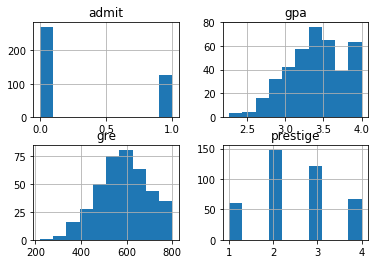

In [44]:
df.hist()
pl.show()

#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [45]:
odds_exposed = 33/28 #odds ratio 

In [46]:
odds_exposed

1.1785714285714286

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [47]:
odds_notexposed = 93/243


In [48]:
odds_notexposed

0.38271604938271603

In [49]:
odds_exposed/odds_notexposed

3.079493087557604

#### 3.3 Calculate the odds ratio

In [50]:
odds_exposed/odds_notexposed

3.079493087557604

#### 3.4 Write this finding in a sentenance: 

Answer: You have a 3 out of 1 probability of being admitted if you go to a #1 ranked school. So it means for every three students admitted one will not be admitted. A risk of 3/4 or 75%.

#### 3.5 Print the cross tab for prestige_4

In [51]:
(pd.crosstab(handCalc['admit'], handCalc['prestige_4.0'], rownames= ['admit']))

prestige_4.0,0,1
admit,,
0,216,55
1,114,12


#### 3.6 Calculate the OR 

In [52]:
odds_exposed = 12/55

In [53]:
odds_exposed

0.21818181818181817

In [54]:
odds_notexposed = 114/216

In [55]:
odds_notexposed

0.5277777777777778

In [56]:
odds_exposed/odds_notexposed

0.4133971291866028

#### 3.7 Write this finding in a sentence

Answer: There is about a .4 to 1 probability of being admitted coming from #4 prestige school. So it means for every .4 students admitted one will not be admitted.
An odds ratio of 0.4 means that in one group the outcome is 60% less likely.


## Part 4. Analysis

In [57]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
(data.head())

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [58]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [59]:
traincols = ['gre', 'gpa', 'prestige_2.0','prestige_3.0', 'prestige_4.0', 'intercept']

In [60]:
data[traincols]

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,380.0,3.61,0,1,0,1.0
1,660.0,3.67,0,1,0,1.0
2,800.0,4.00,0,0,0,1.0
3,640.0,3.19,0,0,1,1.0
4,520.0,2.93,0,0,1,1.0
5,760.0,3.00,1,0,0,1.0
6,560.0,2.98,0,0,0,1.0
7,400.0,3.08,1,0,0,1.0
8,540.0,3.39,0,1,0,1.0
9,700.0,3.92,1,0,0,1.0


In [61]:
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,0,380.0,3.61,0,1,0,1.0
1,1,660.0,3.67,0,1,0,1.0
2,1,800.0,4.00,0,0,0,1.0
3,1,640.0,3.19,0,0,1,1.0
4,0,520.0,2.93,0,0,1,1.0


#### 4.2 Fit the model

In [62]:
traincols = data.columns[1:]

In [34]:
logit = sm.Logit(data['admit'], data[traincols])

AttributeError: module 'statsmodels' has no attribute 'Logit'

In [ ]:
result = logit.fit() 

In [ ]:
#prestige_1 will used as a baseline and exclude it from fit to prevent multicollinearity

#### 4.3 Print the summary results

In [ ]:
print result.summary()

In [ ]:
#will show  Logit Regression Results (an over view of the model)

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [ ]:
print np.exp(result.params)

In [ ]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

#Looking at the confidence interval it shows how strong it is to the model, 
There is conf. that there is an inverse relationship between the probability of being admitted & the prestige of undergraduate school.

#### 4.5 Interpret the OR of Prestige_2

Answer: The OR of prestige_2 shows the odds of being admitted will decrease by around 50% if you attend a #2 rank undergrad school.

Answer:Take the exponential of each of the coefficients to generate the odds ratios. This tells you how a 1 unit increase or decrease in a variable affects the odds of being admitted. 
For example, we can expect the odds of being admitted to decrease by about 50% if the prestige of a school is 2.

#### 4.6 Interpret the OR of GPA

 Answer: The OR of GPA shows the odds of being admitted considering GPA will increase by around 2.23 or 1.23%.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [ ]:
def cartesian(arrays, out=None):
     arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [ ]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
(print gres())
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
(print gpas())
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

#shows min/max observed values

#### 5.1 Recreate the dummy variables

In [ ]:
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']
# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])    

#### 5.2 Make predictions on the enumerated dataset

In [66]:
combos['admit_pred'] = result.predict(combos[traincols])
print combos.head()

SyntaxError: invalid syntax (<ipython-input-66-bc9d94d0ccb4>, line 2)

#### 5.3 Interpret findings for the last 4 observations

Answer: 
1) Cross joins which form the cartesian product and are used to run caculation on all possible combinations.
2)The np.linspace creates a range of values for "gre" and "gpa" for MIN and MAX with values inbetween with a total of 10 values. 
3) We are droping presitage_1 to prevent multicollinearity
4)The predictions on enumerated dataset shows admission predication based on the values. For example 0 & 4 have a greater probability of being admitted based on being the value under "admit_pred" is closer to one.
The results show gre, gpa, and prestige affect the admission levels. There is a higher probability of admission as gre and gpa increases and also with a higher rank prestigous school.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.